# Space Vibes
<b> by Jaye Verniero (they/them), NASA Goddard Space Flight Center, jaye.l.verniero@nasa.gov </b>


All information in the universe is a wave. One only needs to extract these waves and interpret their meaning. In this tutorial, we show how to analyze the wave data from the Parker Solar Probe (PSP) (http://parkersolarprobe.jhuapl.edu/) FIELDS instrument (https://fields.ssl.berkeley.edu/instruments/). 

Spacecraft data analysis is primarily contingent on the user understanding how the data is stored, subsequently learning how to best orchestrate it in order to extract patterns (signals). 

The Common Data Format (CDF) is a format that has been recently championed by NASA. It is very common for more recent data recorded by in situ measurements as well as reprocessed data from older missions. More information on CDF and tools can be found here: https://cdf.gsfc.nasa.gov/ . A very helpful Jupyter Notebook detailing how to open and read CDF files can be found here: https://github.com/kpaulson/PSPGatewayHelp/blob/master/JupyterNotebook_Tutorials/General/CDF_howTo/CDF_howTo.ipynb 

In this tutorial, we will use the CDF reader that is built into a library called PySPEDAS (https://pyspedas.readthedocs.io/en/latest/), an implementation of the Space Physics Environment Data Analysis Software (SPEDAS) framework in Python. 

The SPEDAS framework is written in Interactive Data Language (IDL) and contains data loading, data analysis and data plotting tools for various scientific missions (NASA, NOAA, etc.) and ground magnetometers. However, the IDL coding language is not free and not as ubiquituous amongst scientists outside the space physics discipline. There is a large movement in the space physics community toward "Open Science," meaning that folks share more code and data with eachother to better acheive a common goal. Since Python is free and more universal, space scientists are now working on converting their scripts from IDL to Python which has been better enabled by the recent development of PySPEDAS. Here is an example tutorial of pySPEDAS (https://github.com/heliophysicsPy/summer-school/blob/main/pyspedas-tutorial/PySPEDAS_Summer_School_2022.ipynb). For more documentation on using Python for space physics data analysis, see here: https://github.com/heliophysicsPy .

# Step 1

First, we install PySPEDAS using instructions from this link: https://github.com/spedas/pyspedas

Follow all steps under the Installation Section. We first import the following:


In [2]:
import pyspedas
from pytplot import tplot, store_data, get_data ,tlimit,xlim,ylim,tplot_options,options,split_vec
from pyspedas import time_string, time_double

#import math functions 
import numpy as np

First, we choose a time range of interest. Let's choose an interval during PSP' 8th orbit around the Sun, during perhilion (when PSP was closest to the Sun). Note this is commmonly referred to as Encounter 8, or E8.

We start with plotting magnetic field data in the Radial-Tangential-Normal (RTN) coordinate system, which is spacecraft-specific and fixed to that spacecraft. Depending on the spacecraft, this could generally be considered inertial (WIND, ACE if you are looking at large/long scales) but could also not be inertial (PSP).
The radial direction is fixed between the center of the Sun and the spacecraft. The tangential direction is the cross-product between $\Omega$ and R, where $\Omega$ is the Sun's spin axis. In PSP's case, this makes the T-direction roughly equal to the spacecraft ram direction. N=RxT and so is also equal to $\Omega$.

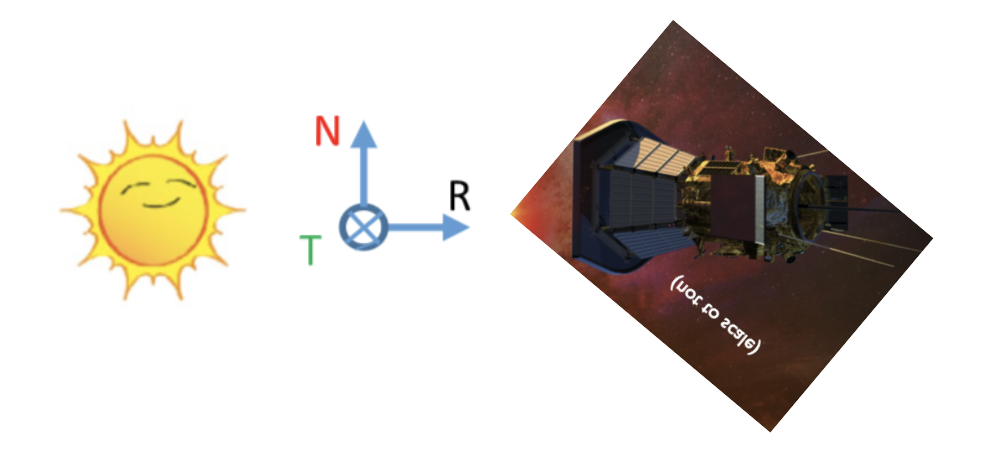


01-Oct-22 10:14:53: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2021/
01-Oct-22 10:14:53: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20210429_v02.cdf


Time clip was applied to: psp_fld_l2_mag_RTN_4_Sa_per_Cyc


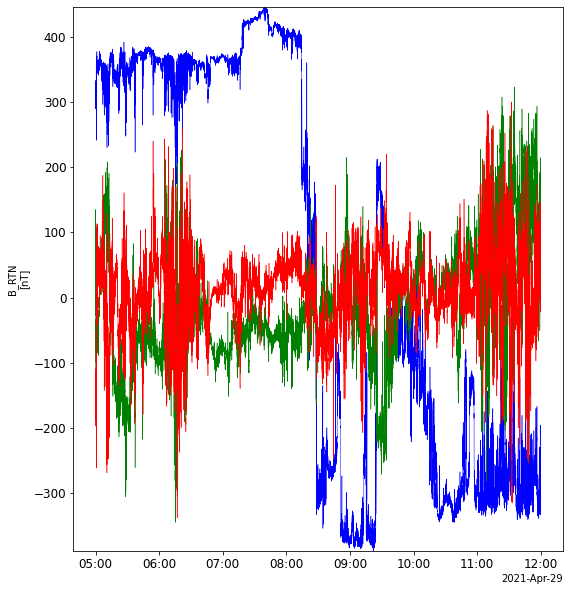

In [6]:
#specify time range in the form ['yyyy-mm-dd/hh:mm:ss','yyyy-mm-dd/hh:mm:ss']
time_range=['2021-04-29/05:00:00','2021-04-29/12:00:00']

#load data
#note we are downloading lower time cadence, 4 samples per cycle data
fields_vars=pyspedas.psp.fields(datatype='mag_rtn_4_sa_per_cyc',trange=time_range,time_clip=True)

#plot data vs time
tplot('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')